## SC1015 Project

Ever wondered whether a particular song genre has defining characteristics that makes them unique? Have you wondered if certain types of music can help to boost a store's business? In this project, we utilize the Song Popularity Dataset on Kaggle to find out if the popularity of a song can be determined by acoustic data such as acousticness, danceability, liveliness and energy.

We aim to:
1. Accurately predict the genre of a particular song based upon their characteristics. 
2. Demonstrate how accurate our predictions are by testing our prediction model on a separate dataset
3. Demonstrate how relevant our predictions are in real life by helping store owners create their own brand and atmosphere by crafting an unique playlist for them with the goal of increasing their revenue

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [2]:
# only if running on Google Colab
#from google.colab import drive
#drive.mount('/content/drive')

---

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

Kaggle Dataset Link: https://www.kaggle.com/akiboy96/spotify-genre-joined

In [3]:
#songdata = pd.read_csv('data/knn_songs.csv', index_col=0)
#songdata = pd.read_csv('data/genre_music.csv')
songdata = pd.read_csv('data/genre_music.csv')
songdata = songdata.sort_values(['track'])
#songdata = songdata.sort_values(["decade"], ascending = (False))
songdata.head(20)

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
11343,"""""Cherry Cherry"""" from Hot August Night",Neil Diamond,0.341,0.94800,9,-5.081,1,0.1360,0.10100,0.001480,0.8740,0.6320,171.578,443.320,4,53.79041,16,1,70s,rock
4669,"""""Come, Sleep...""""",Louise Bogan,0.734,0.06940,3,-24.330,1,0.9170,0.61100,0.000000,0.1060,0.3190,108.734,78.472,5,31.28651,4,0,60s,rap
21253,"""""I'll Be Back"""" / Police Station & Escape",Brad Fiedel,0.201,0.39100,7,-16.067,1,0.0479,0.88900,0.864000,0.1110,0.1810,59.801,226.310,4,38.29173,10,0,80s,rock
39054,"""""Is This My Fate,"""" He Asked Them",Story Of The Year,0.254,0.97000,8,-4.635,1,0.0789,0.00015,0.005860,0.1410,0.1660,99.963,300.520,4,55.19977,13,0,10s,rock
15187,"""""Jerry"""" To The Rescue",Pino Donaggio,0.215,0.24200,0,-15.141,0,0.0398,0.58400,0.936000,0.1460,0.0613,116.234,143.520,4,25.60898,9,0,70s,rock
2495,"""""Joseph, lieber Joseph mein""""",Traditional,0.282,0.05950,7,-26.589,1,0.0415,0.99300,0.849000,0.1070,0.2010,76.620,110.173,4,32.82781,7,0,60s,rock
6039,"""""Móvil"""" Oil Special",Victor Jara,0.544,0.62900,10,-11.324,1,0.1770,0.86700,0.000006,0.3470,0.5860,108.040,167.834,4,79.72459,7,0,60s,pop
4877,"""""Tragic"""" Overture, Op. 81: Allegro ma non tr...",National Philharmonic Orchestra,0.193,0.12300,2,-16.581,0,0.0397,0.97900,0.881000,0.0848,0.0936,83.204,697.387,4,49.61964,30,0,60s,rock
34927,$ave Dat Money,Lil Dicky Featuring Fetty Wap & Rich Homie Quan,0.858,0.69700,2,-5.361,1,0.2300,0.11400,0.000000,0.2240,0.3640,98.012,290.836,4,38.04379,13,1,10s,rap
6348,' Cello Song,Nick Drake,0.507,0.39000,3,-17.218,1,0.0326,0.65700,0.859000,0.0613,0.5200,118.805,284.987,4,41.96860,11,0,60s,r&b


Description of the dataset, as available on Spotify's Web API Developer Guide, is as follows:
Links:
1) https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features 

2) https://www.kaggle.com/theoverman/the-spotify-hit-predictor-dataset

> **Track** : Song Name

> **Artist** : Song Composer  

> **Danceability** : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.  

> **Energy** : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.  

> **Key** : The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. 

> **Loudness** : The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

> **Mode** : Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.      

> **Speechiness** : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.         

> **Acousticness** : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 

> **Instrumentalness** : Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.       

> **Liveness** : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.      

> **Valence** : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).           

> **Tempo** : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

> **Duration_s** : The duration of the track in miliseconds  

> **Time_signature** : An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".   

> **Chorus_hit** : This is the the author's best estimate of when the chorus would start for the track. It is the timestamp of the start of the third section of the track.

> **Sections** : The number of sections the particular track has. 

> **Popularity** : Popularity is a represented as a binary feature with 1 for a popular song and 0 for an unpopular song. A song is considered popular if it charts on the Billboard Hot 100, appeared in the US market, and belonged to a mainstream genre.

> **Decade** : Decade of song it belongs to. Split into six different categories: 60s/70s/80s/90s/00s/10s

> **Genre** : Genre of song. Split into five different categories: Rock/Rap/EDM/R&B/Pop

---

Check the vital statistics of the dataset using the `type` and `shape` attributes.

In [4]:
print("Shape: ", songdata.shape)
songdata.dtypes

Shape:  (41099, 20)


track                object
artist               object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_s          float64
time_signature        int64
chorus_hit          float64
sections              int64
popularity            int64
decade               object
genre                object
dtype: object

In [5]:
songdata.info

<bound method DataFrame.info of                                             track             artist  \
11343     ""Cherry Cherry"" from Hot August Night       Neil Diamond   
4669                           ""Come, Sleep...""       Louise Bogan   
21253  ""I'll Be Back"" / Police Station & Escape        Brad Fiedel   
39054          ""Is This My Fate,"" He Asked Them  Story Of The Year   
15187                     ""Jerry"" To The Rescue      Pino Donaggio   
...                                           ...                ...   
34817                                        胜者为王                 窒息   
31872                                    薔薇と彼女の王子   Heartsrevolution   
38777                                         还有谁                 窒息   
32309                                          迷彩       Sheena Ringo   
40103                                          雏鹰                 窒息   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
11343         0.341  0.9

### Step 1
Clean the dataset to remove duplicate songs.

Reference: https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f

In [6]:
songdata.groupby(['genre']).count()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade
genre,,,,,,,,,,,,,,,,,,,
edm,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515
latin,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870
pop,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460
r&b,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040
rap,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364
rock,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850


We can use the _duplicated()_ function to find duplicates in the dataset. As can be seen from the sum, there are 5,246 duplicated rows with the same track variable value.

In [7]:
songdata.track.duplicated().sum()

5246

View duplicate rows:

In [8]:
songdata.loc[songdata.track.duplicated(), :]

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
13562,'Buked and Scorned',Big Joe Williams,0.452,0.239,4,-17.514,0,0.0463,0.6890,0.000195,0.6820,0.673,92.399,322.173,4,50.14461,14,0,70s,r&b
1284,'Round Midnight,Gerald Wilson Orchestra,0.503,0.227,3,-16.926,0,0.0314,0.8440,0.665000,0.1030,0.208,109.100,312.893,4,26.91597,13,0,60s,r&b
6521,'Round Midnight,Sonny Rollins,0.424,0.205,10,-13.869,0,0.0290,0.9050,0.780000,0.1240,0.164,97.331,239.707,4,23.07802,11,0,60s,pop
34567,(I Can't Get No) Satisfaction,Sky Saxon,0.531,0.850,2,-5.379,1,0.0415,0.0031,0.000000,0.1530,0.739,134.945,236.947,4,40.80212,7,0,00s,pop
11879,(I Know) I'm Losing You,Rare Earth,0.463,0.553,6,-14.648,1,0.0465,0.5730,0.000037,0.3150,0.715,100.608,215.987,4,28.63916,9,1,70s,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,Água De Beber,Antônio Carlos Jobim,0.717,0.209,4,-20.825,0,0.0519,0.7430,0.885000,0.0752,0.907,135.681,170.627,4,45.61740,10,0,60s,pop
8656,Águas De Marco,Elis Regina,0.611,0.322,3,-13.666,1,0.2870,0.8020,0.000044,0.1210,0.857,150.686,185.773,4,42.88205,10,0,70s,rap
24742,Águas De Março,Antônio Carlos Jobim,0.652,0.377,3,-14.848,1,0.1760,0.8450,0.000001,0.1030,0.506,143.767,212.493,4,35.39803,11,0,90s,pop
20781,Águas De Março,Antônio Carlos Jobim,0.649,0.321,3,-16.751,1,0.1280,0.7780,0.000000,0.0943,0.572,143.719,211.627,4,35.36344,13,0,80s,pop


Finally, to drop the duplicate rows, we can use the _drop_duplicates()_ function to drop the rows with duplicates from the dataframe. We set `keep` to `first` to keep only the first occurrence of the row, and set `inplace=True` to update the original dataframe. 

In [9]:
songdata.drop_duplicates(subset=['track'], keep='first', inplace=True)
print('New shape: ', songdata.shape)
songdata.head()

New shape:  (35853, 20)


,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
11343,"""""Cherry Cherry"""" from Hot August Night",Neil Diamond,0.341,0.9480,9,-5.081,1,0.1360,0.10100,0.00148,0.874,0.6320,171.578,443.320,4,53.79041,16,1,70s,rock
4669,"""""Come, Sleep...""""",Louise Bogan,0.734,0.0694,3,-24.330,1,0.9170,0.61100,0.00000,0.106,0.3190,108.734,78.472,5,31.28651,4,0,60s,rap
21253,"""""I'll Be Back"""" / Police Station & Escape",Brad Fiedel,0.201,0.3910,7,-16.067,1,0.0479,0.88900,0.86400,0.111,0.1810,59.801,226.310,4,38.29173,10,0,80s,rock
39054,"""""Is This My Fate,"""" He Asked Them",Story Of The Year,0.254,0.9700,8,-4.635,1,0.0789,0.00015,0.00586,0.141,0.1660,99.963,300.520,4,55.19977,13,0,10s,rock
15187,"""""Jerry"""" To The Rescue",Pino Donaggio,0.215,0.2420,0,-15.141,0,0.0398,0.58400,0.93600,0.146,0.0613,116.234,143.520,4,25.60898,9,0,70s,rock


We have about 35853 unique songs. We can probably parse the song name and categorized it by language as well.

### Step 2
Perform exploratory analysis on the acoustic data of the songs.

> Use the following code to identify other non-English languages in Song Name among the 13070 records

In [ ]:
songdata = songdata.sort_values(["decade"], ascending = (False))
songdata.head(50)

In [ ]:
# Summary Statistics for numeric Variables
songdata.describe().round(3)

In [ ]:
songdata.info()

In [ ]:
# Draw the box-plot distribution of all 14 numeric variables

# import data about boxplots from matplotlib (since SeaBorn uses MatPlotLib for plotting)
from matplotlib.cbook import boxplot_stats  
f, axes = plt.subplots(18, 1, figsize=(18, 30))

count = 0

print("Sequence of Box Plots: ")
for var in songdata:
    if(var != "track" and var != "artist" and var != "decade" and var != "genre"):
        #print(var)
        print(count, ") ", var)
        print("Number of outliers = ", len(boxplot_stats(songdata[var]).pop(0)['fliers']), "\n")
        sb.boxplot(data = songdata[var], orient = "h", ax = axes[count], fliersize = 8.0)
        axes[0].set_title(var)
    count += 1

#sb.boxplot(data = songdata['danceability'], orient = "h", ax = axes[0], fliersize = 8.0)
#axes[0].set_title('danceability')

#sb.boxplot(data = songdata['energy'], orient = "h", ax = axes[1], fliersize = 8.0)
#axes[0].set_title('energy')

In [ ]:
# Draw the histogram & violin plot distributions of all 4 variables
f, axes = plt.subplots(16, 3, figsize=(18, 30))

print("Sequence of Plots: ")
count = 0
for var in songdata:
    if(var != "track" and var != "artist" and var != "decade" and var != "genre"):
        print(count, ") ", var)
        sb.boxplot(data = songdata[var], orient = "h", ax = axes[count,0])
        sb.histplot(data = songdata[var], ax = axes[count,1])
        sb.violinplot(data = songdata[var], orient = "h", ax = axes[count,2])
        count += 1

        print("Skewness: {:.3f}".format(songdata[var].skew()))
        print("Kurtosis: {:.3f}".format(songdata[var].kurt()))

In [ ]:
# Correlation Matrix
print(songdata.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(28, 28))
sb.heatmap(songdata.corr(), vmin = -1, vmax = 1, linewidths = 10,
           annot = True, fmt = ".2f", annot_kws = {"size": 24}, cmap = "RdBu")

### Step 3

> Create a prediction model that would accurately predict the genre of a song based on song characteristics

The prediction model that we have decided to use is the **Feed Forward Neural Network (Multi-layer Perceptron)**

We feel that this model would be the most suitable as it is modelled after the human's brain ability to learn and improve itself constantly. 

A feed forward neural network is comprised of an input layer, some number of hidden layers, and an output layer. Each layer consists a number of nodes. Every unit in a layer is connected with all the units in the previous layer. These connections are not all equal: each connection may have a different strength or weight. Data enters at the inputs and passes through the network, layer by layer, until it arrives at the outputs. 

The operation of the network can be divided into two phases:
- The learning phase
- The classification phase

**Learning Phase**

Learning proceeds as follows: a pattern is presented at the inputs. The pattern will be transformed in its passage through the layers of the network until it reaches the output layer. The outputs of the network as they are now are compared with the outputs as they ideally would have been if this pattern were correctly classified: in the latter case the unit with the correct category would have had the largest output value and the output values of the other output units would have been very small. On the basis of this comparison all the connection weights are modified a little bit to guarantee that, the next time this same pattern is presented at the inputs, the value of the output unit that corresponds with the correct category is a little bit higher than it is now and that, at the same time, the output values of all the other incorrect outputs are a little bit lower than they are now.

This process is repeatedly thousands, even ten of thousands of times in order to fine-tune the weight of each connection. The end result would be a neural network that can correctly predict every single data point that has been initially fed to it, and be able to even correctly classify any unknown pattern present to it.

**Classification Phase**

In the classification phase, the weights of the network are fixed.

A pattern, presented at the inputs, will be transformed from layer to layer until it reaches the output layer. Now classification can occur by selecting the category associated with the output unit that has the largest output value.

In contrast to the learning phase classification is very fast.

References:

1) https://www.fon.hum.uva.nl/praat/manual/Feedforward_neural_networks_1__What_is_a_feedforward_ne.html

2) https://www.fon.hum.uva.nl/praat/manual/Feedforward_neural_networks_1_1__The_learning_phase.html

3) https://www.fon.hum.uva.nl/praat/manual/Feedforward_neural_networks_1_2__The_classification_pha.html

MLPClassifier predicts classes that inputs fall into, and therefore we need to classify the song_popularity values and label encode them.

In [10]:
popularity_class = []

#for var in songdata['song_popularity']:
#   if(0 <= var and var <= 50):
#        popularity_class.append(0)
#    else:
#        popularity_class.append(1)

#songdata['popularity_class'] = popularity_class
#songdata.head()

from sklearn.preprocessing import LabelEncoder

# label encoding song_popularity
songdata['genre'] = LabelEncoder().fit_transform(songdata['genre'])
songdata.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
11343,"""""Cherry Cherry"""" from Hot August Night",Neil Diamond,0.341,0.9480,9,-5.081,1,0.1360,0.10100,0.00148,0.874,0.6320,171.578,443.320,4,53.79041,16,1,70s,5
4669,"""""Come, Sleep...""""",Louise Bogan,0.734,0.0694,3,-24.330,1,0.9170,0.61100,0.00000,0.106,0.3190,108.734,78.472,5,31.28651,4,0,60s,4
21253,"""""I'll Be Back"""" / Police Station & Escape",Brad Fiedel,0.201,0.3910,7,-16.067,1,0.0479,0.88900,0.86400,0.111,0.1810,59.801,226.310,4,38.29173,10,0,80s,5
39054,"""""Is This My Fate,"""" He Asked Them",Story Of The Year,0.254,0.9700,8,-4.635,1,0.0789,0.00015,0.00586,0.141,0.1660,99.963,300.520,4,55.19977,13,0,10s,5
15187,"""""Jerry"""" To The Rescue",Pino Donaggio,0.215,0.2420,0,-15.141,0,0.0398,0.58400,0.93600,0.146,0.0613,116.234,143.520,4,25.60898,9,0,70s,5


We now need to scale the predictor variables so that they can be used together to predict the popularity_class.

If a particular predictor variable has particularly high numerical values, it'll decrease the prediction accuracy of our model. Hence, saling the predictor variables is important as it will help to prevent this.

The predictor variables that we've decided to use are:

- Acousticness
- Danceability
- Energy
- Key
- Instrumentalness
- Liveness
- Loudness
- Tempo
- Valence
- Mode
- Speechiness
- Duration_s

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

songdata[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'time_signature', 'valence', 'mode', 'speechiness']] = MinMaxScaler().fit_transform(songdata[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'time_signature', 'valence', 'mode', 'speechiness']])

songdata.drop(columns=['popularity', 'track', 'artist', 'decade', 'time_signature', 'sections', 'chorus_hit'], inplace=True)
songdata.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,genre
count,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000
mean,0.543350,0.577640,5.198393,0.734854,0.691351,0.077077,0.370930,0.161870,0.192366,0.542389,0.494077,235.412968,2.755167
std,0.181269,0.254805,3.533529,0.101619,0.461942,0.091748,0.342750,0.309411,0.176929,0.270009,0.121035,122.663760,1.301983
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.168000,0.000000
25%,0.421053,0.391847,2.000000,0.685378,0.000000,0.035313,0.039458,0.000000,0.082252,0.327309,0.402551,172.213000,2.000000
50%,0.555668,0.598899,5.000000,0.753590,1.000000,0.045625,0.268072,0.000143,0.120690,0.558233,0.486246,217.627000,2.000000
75%,0.676113,0.786947,8.000000,0.808404,1.000000,0.073958,0.688755,0.082000,0.253550,0.770080,0.565837,267.093000,3.000000
max,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4170.227000,5.000000


In [12]:
songdata['genre'].value_counts()

2    14247
3     9499
5     6157
1     2497
4     2127
0     1326
Name: genre, dtype: int64

We note that the numbers of each songs per category are different. For example, there are 14247 songs in the Pop genre, whereas there are only 1326 songs in the EDM genre. Although using a Train/Test model would help to obtain random sampling of data, as there is a huge difference in sample size between song categories, we run the risk of introducing a significant sampling bias. 

Hence, we use Stratified Sampling Technique, which would help to eliminate the biasness of the selection of data.

Source: https://medium.com/@IrekponorVictor/creating-an-unbiased-test-set-for-your-model-using-stratified-sampling-technique-672b778022d5

In [13]:
# importing StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_index, test_index in split.split(songdata, songdata['genre']):
     train_set, test_set = songdata.iloc[train_index], songdata.iloc[test_index]

# after obtaining train/test set, proceed to split train into X and y train set, and test into x and y test set
y_train = pd.DataFrame(train_set['genre'])
x_train = train_set
x_train = x_train.drop(columns=['genre'])

y_test = pd.DataFrame(test_set['genre'])
x_test = test_set
x_test = x_test.drop(columns=['genre'])

Check how many songs in each genre there are in train/test set

In [14]:
y_train.value_counts()

genre
2        11397
3         7599
5         4925
1         1998
4         1702
0         1061
dtype: int64

In [15]:
y_test.value_counts()

genre
2        2850
3        1900
5        1232
1         499
4         425
0         265
dtype: int64

After obtaining Train/Test data, use MLPClassifier

We have chosen the sgd (Stochastic gradient descent) solver, as well as the adaptive learning rate for our MLP model. Data is passed through the neural network 1000 times.

In [16]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

#y_train_minmax = MinMaxScaler().fit_transform(y_train)
#y_train_minmax = y_train_minmax.astype('int')
#y_train_normalized = (y_train-y_train.min())/(y_train.max()-y_train.min())

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(15, 8, 5), max_iter=1000,activation = 'relu',solver='sgd',learning_rate='adaptive',batch_size=258,random_state=1)

classifier.fit(x_train, y_train.values.ravel())
y_pred = classifier.predict(x_train)

#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_train)

#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.6571717453455128


Hmm, that's not very good. The neural network should be able to predict the data that was initially fed in to a very high accuracy. Let's try to improve the model by adjusting certain values.

### Step 4
> Improving the neural network prediction model

In [17]:
# try out 10% test
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1)

for train_index, test_index in split.split(songdata, songdata['genre']):
     train_set, test_set = songdata.iloc[train_index], songdata.iloc[test_index]

# after obtaining train/test set, proceed to split train into X and y train set, and test into x and y test set
y_train = pd.DataFrame(train_set['genre'])
x_train = train_set
x_train = x_train.drop(columns=['genre'])

y_test = pd.DataFrame(test_set['genre'])
x_test = test_set
x_test = x_test.drop(columns=['genre'])

In [18]:
y_train.value_counts()

genre
2        12822
3         8549
5         5541
1         2247
4         1914
0         1194
dtype: int64

In [19]:
y_test.value_counts()

genre
2        1425
3         950
5         616
1         250
4         213
0         132
dtype: int64

After obtaining Train/Test data, use MLPClassifier

In [20]:
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(400, 350, 300, 250, 200), 
                           max_iter= 2000,activation = 'relu',
                           solver='sgd', learning_rate = 'adaptive', 
                           learning_rate_init = 0.0001, batch_size=10,
                           random_state=1)

classifier.fit(x_train, y_train.values.ravel())
y_pred = classifier.predict(x_train)

#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_train)

#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

C:\Users\chooz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy of MLPClassifier :  0.6608919329345772


Try plotting the correlation matrix.

In [ ]:
sb.heatmap(cm, annot=True, fmt=".0f", annot_kws={"size":18})

The accuracy has improved significantly, however, it is still not enough. Ideally, the accuracy of a feed forward neural network should be ~99-100%.

Perhaps we could try to identify predictors that do not really help with the identification of song genres. Certain song genres might have common characteristics, which makes it hard for the neural network to classify data properly.

From the confusion matrix of our model, we can see the following trends: 

- The majority of EDM songs are incorrectly predicted to be (in order greatest to least) Pop, R&B or Rock.
- Latin songs are most incorrectly predicted to be Pop.
- Pop songs are most incorrectly predicted to be Rock.
- R&B songs are most incorrectly predicted to be Rock or Pop.
- Rap songs are most incorrectly predicted to be R&B or Pop.
- Rock songs are most incorrectly predicted to be Pop.

Let's try to find out the reason behind the incorrect predictions

In [21]:
duplicatesongdata = pd.read_csv('data/genre_music.csv')

duplicatesongdata.drop_duplicates(subset=['track'], keep='first', inplace=True)
print('New shape: ', duplicatesongdata.shape)

# drop irrelevant columns
duplicatesongdata.drop(columns=['popularity', 'track', 'artist', 'decade', 'time_signature', 'sections'], inplace=True)

New shape:  (35853, 20)


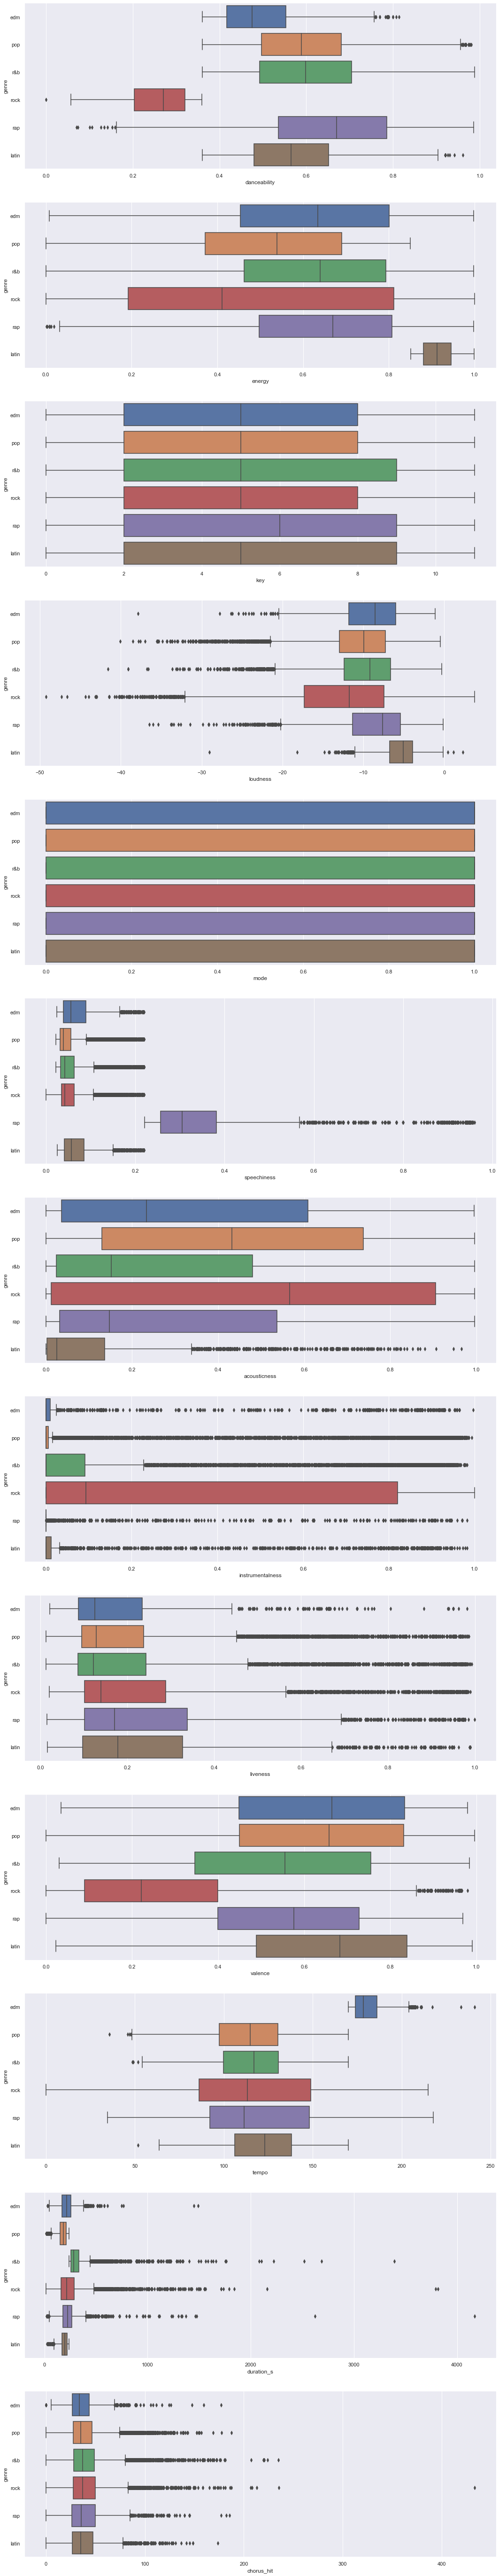

In [22]:
f, axes = plt.subplots(13, 1, figsize=(18, 100))
count = 0;

for var in duplicatesongdata:
    if(var != "genre"):
        sb.boxplot(data=duplicatesongdata, x=var, y="genre", ax=axes[count])
        count += 1

### Similarity in Characteristics Between EDM, Pop, R&B, Rock

Let's plot the scatter plots to find the similarities between EDM, Pop, R&B and Rock.

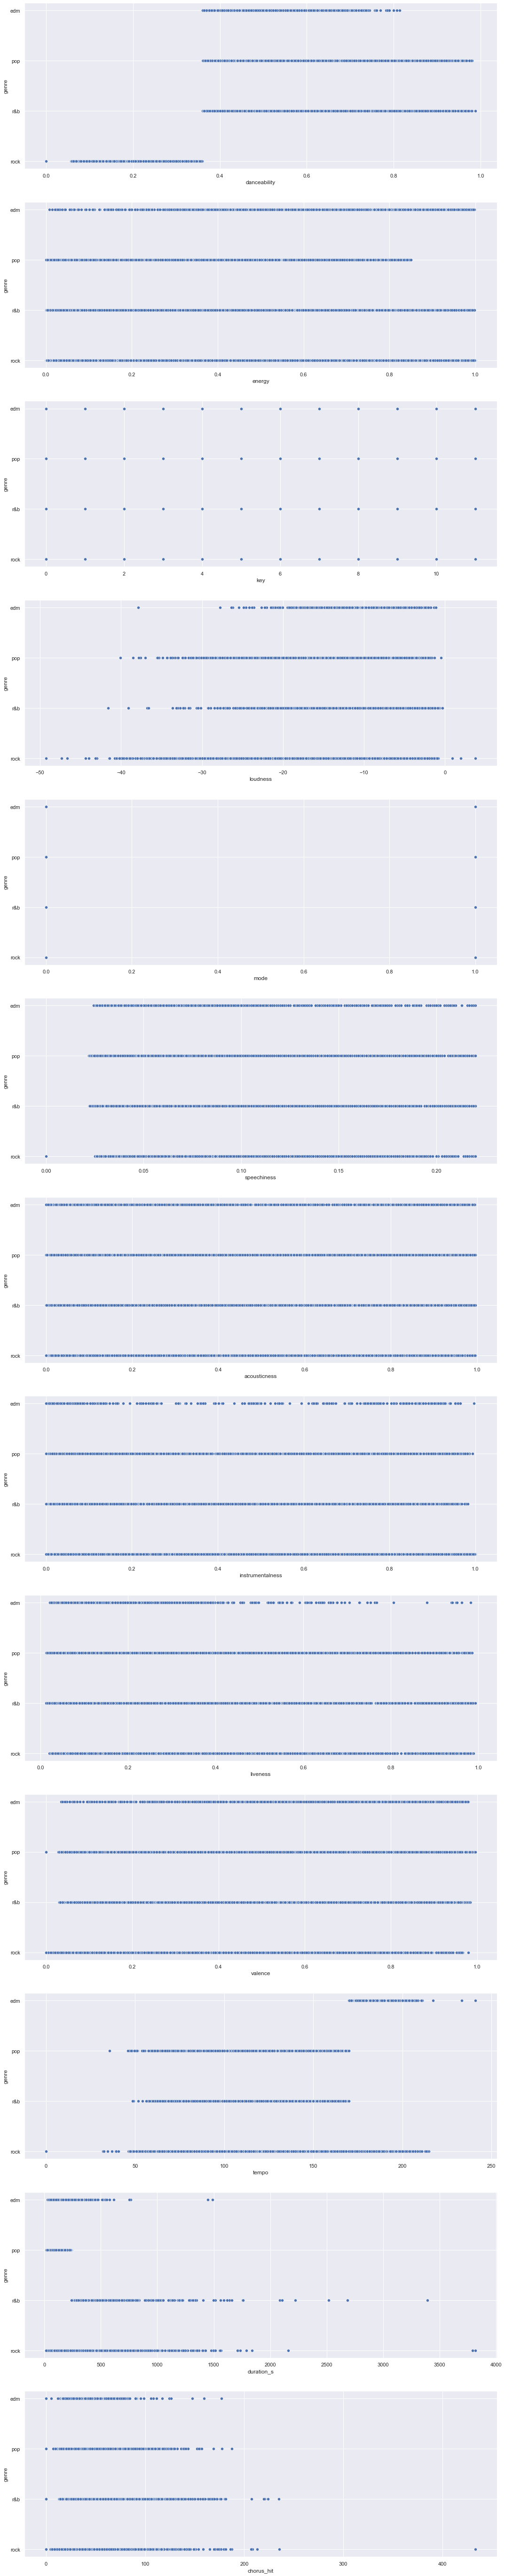

In [24]:
edm_sim_data = duplicatesongdata.loc[(duplicatesongdata['genre'].isin(['edm', 'pop', 'r&b', 'rock']))]

f, axes = plt.subplots(13, 1, figsize=(18, 100))
count = 0;

for var in edm_sim_data:
    if(var != "genre"):
        sb.scatterplot(data=edm_sim_data, x=var, y="genre", ax=axes[count])
        count += 1

Similar clustering of predictor values between EDM, Pop, R&B, and Rock songs:
1. Danceability (EDM, Pop, R&B)
2. Energy
3. Key
4. Loudness
5. Mode
6. Speechiness
7. Acousticness
8. Valence
9. Duration_s
10. Chorus_hit

Predictor values where EDM is unique:
1. Instrumentalness
2. Liveness
3. Tempo

### Similarity in Characteristics Between Latin and Pop

Let's plot the scatter plots to find the similarities between Latin and Pop.

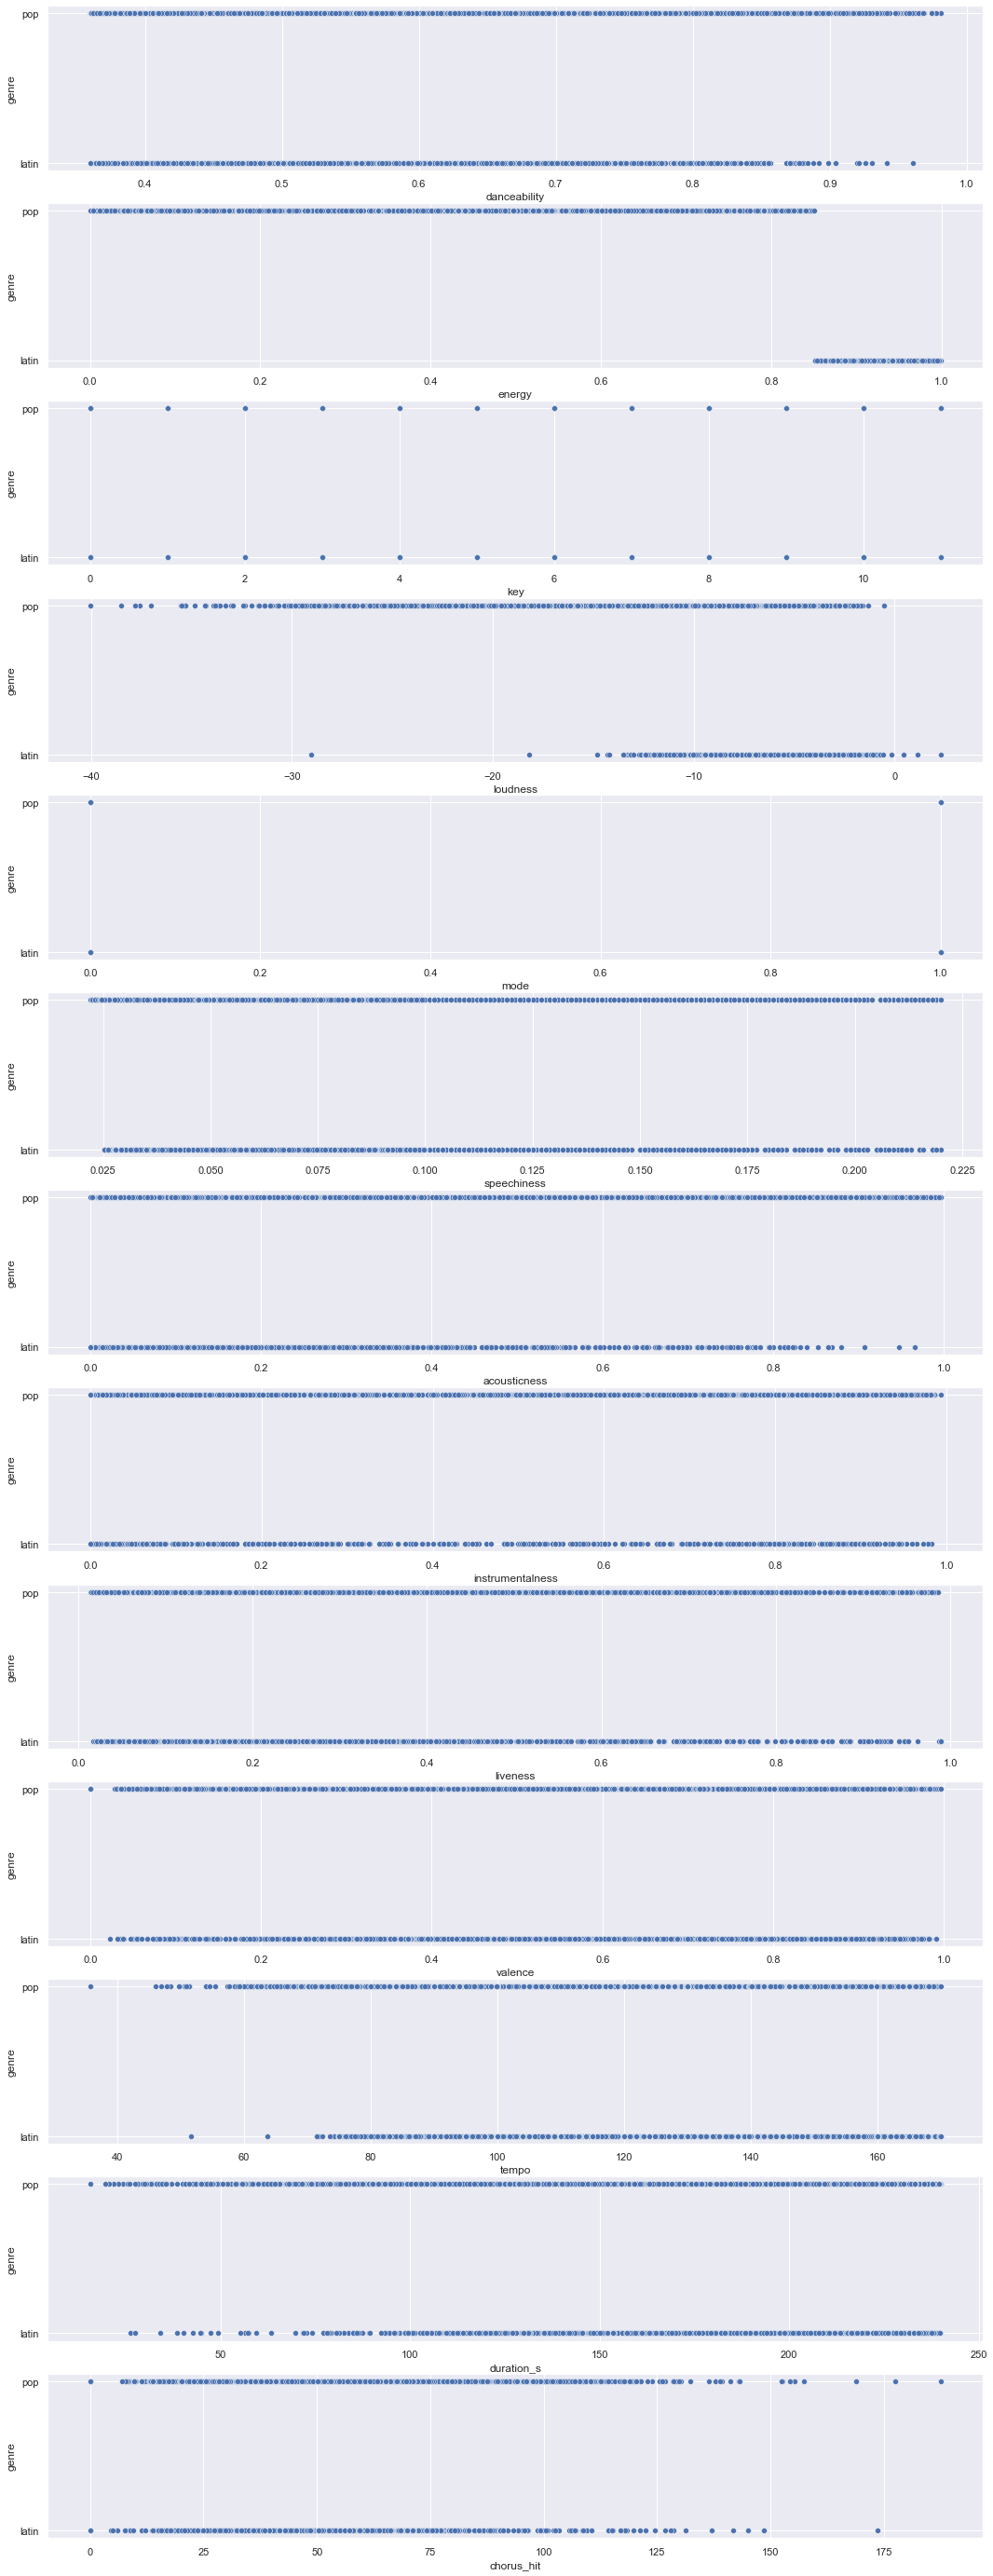

In [26]:
latin_sim_data = duplicatesongdata.loc[(duplicatesongdata['genre'].isin(['latin', 'pop']))]

f, axes = plt.subplots(13, 1, figsize=(18, 50))
count = 0;

for var in latin_sim_data:
    if(var != "genre"):
        sb.scatterplot(data=latin_sim_data, x=var, y="genre", ax=axes[count])
        count += 1

Similar clustering of predictor values between Latin and Pop songs:
1. Danceability
2. Key
3. Mode
4. Speechiness
5. Acousticness
6. Instrumentalness
7. Liveness
8. Valence
9. Tempo
10. Duration_s
11. Chorus_hit

Predictor values where Latin is unique:
1. Energy
2. Loudness

### Similarity in Characteristics Between Pop and Rock

Let's plot the scatter plots to find the similarities between Pop and Rock.

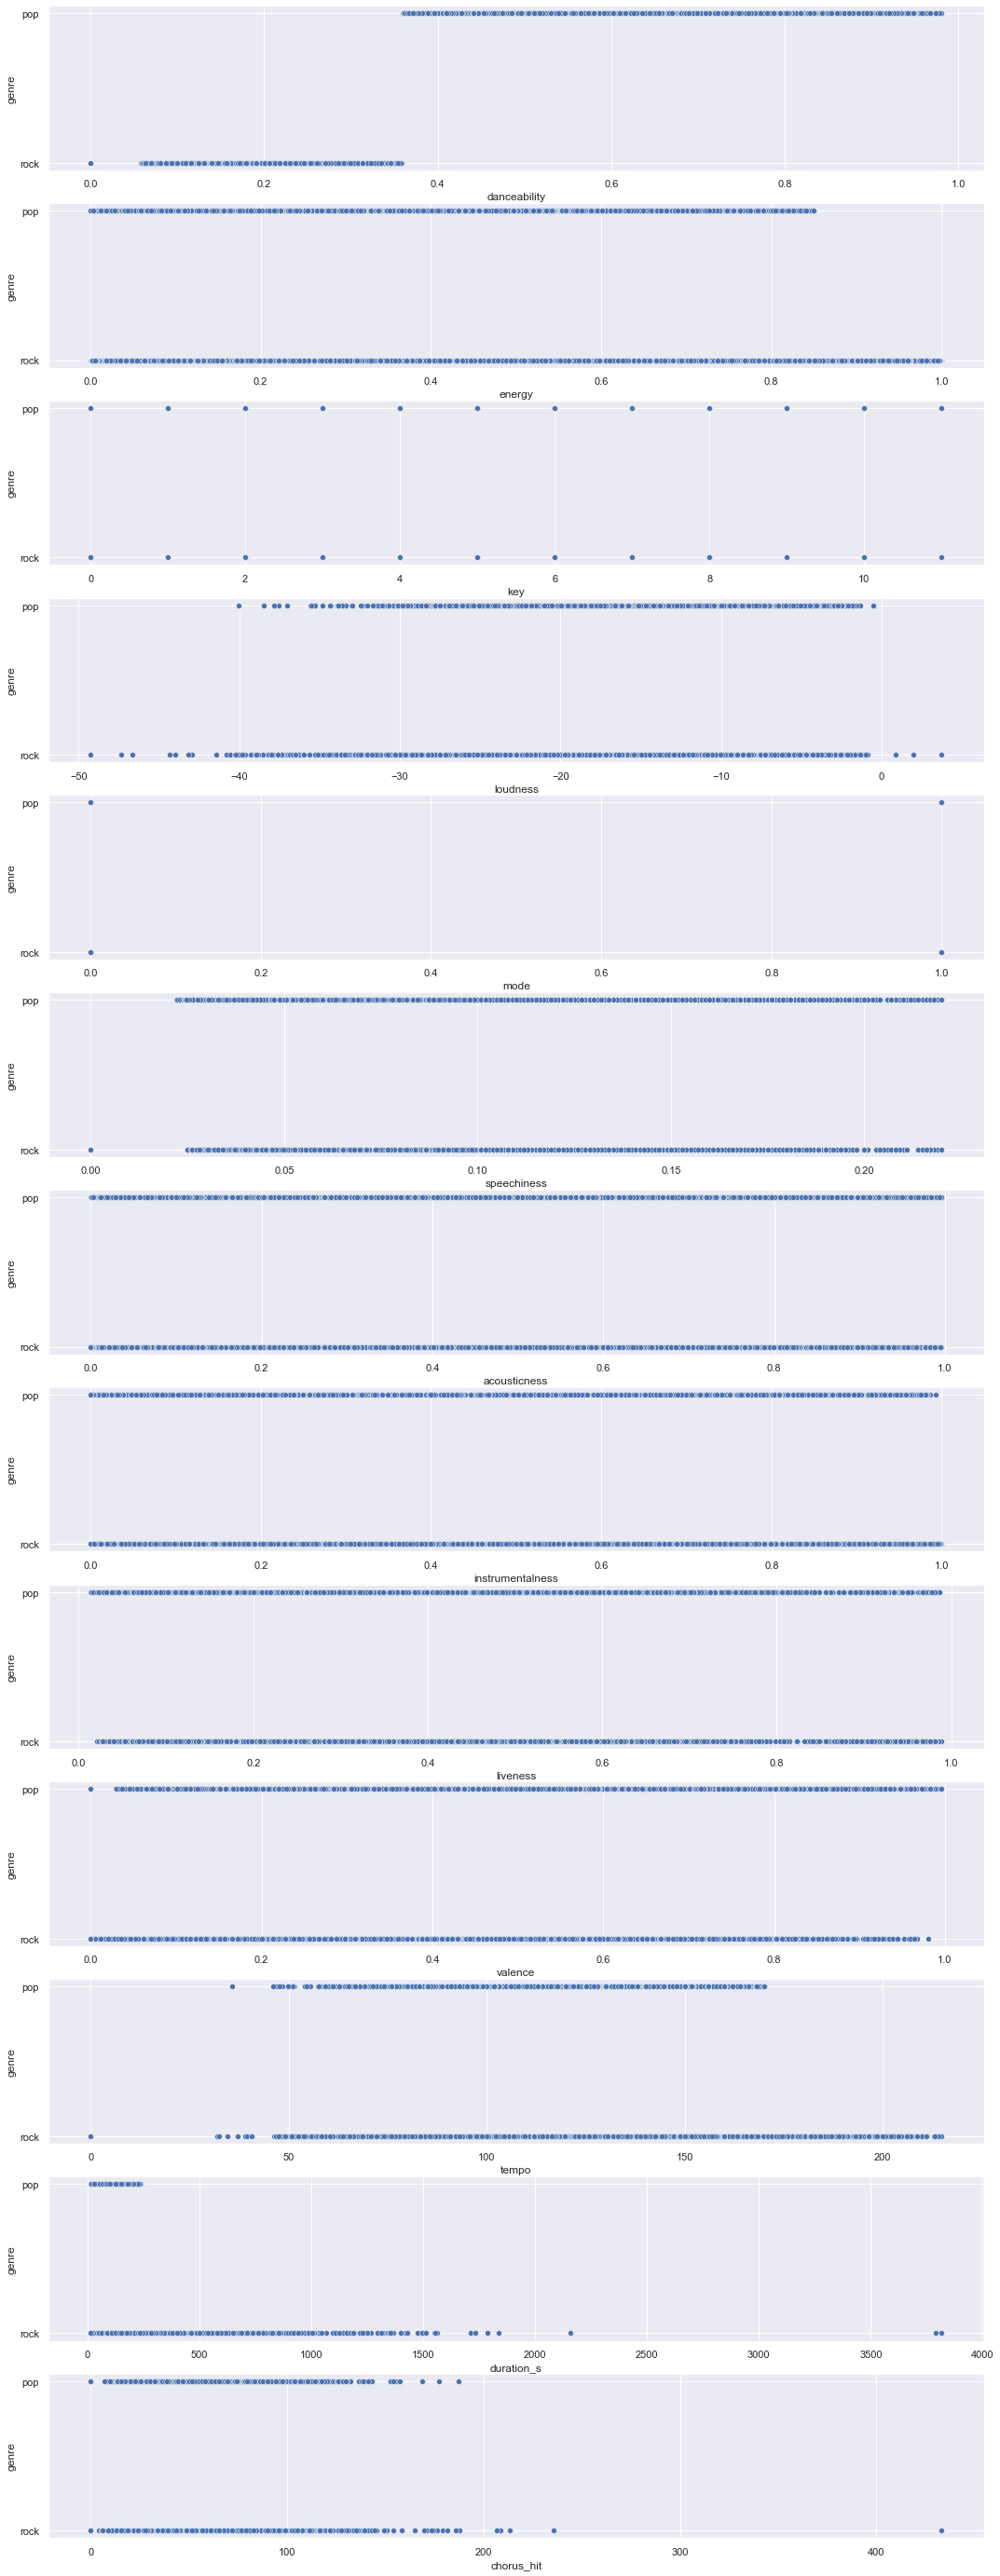

In [28]:
pop_sim_data = duplicatesongdata.loc[(duplicatesongdata['genre'].isin(['pop', 'rock']))]

f, axes = plt.subplots(13, 1, figsize=(18, 50))
count = 0;

for var in pop_sim_data:
    if(var != "genre"):
        sb.scatterplot(data=pop_sim_data, x=var, y="genre", ax=axes[count])
        count += 1

Similar clustering of predictor values between Pop and Rock songs:
1. Energy
2. Key
3. Loudness
4. Mode
5. Speechiness
6. Acousticness
7. Instrumentalness
8. Liveness
9. Valence
10. Tempo
11. Chorus_hit

Predictor values where Pop is unique:
1. Danceability
2. Duration_s

### Similarity in Characteristics Between R&B, Pop and Rock

Let's plot the scatter plots to find the similarities between R&B, Pop and Rock.

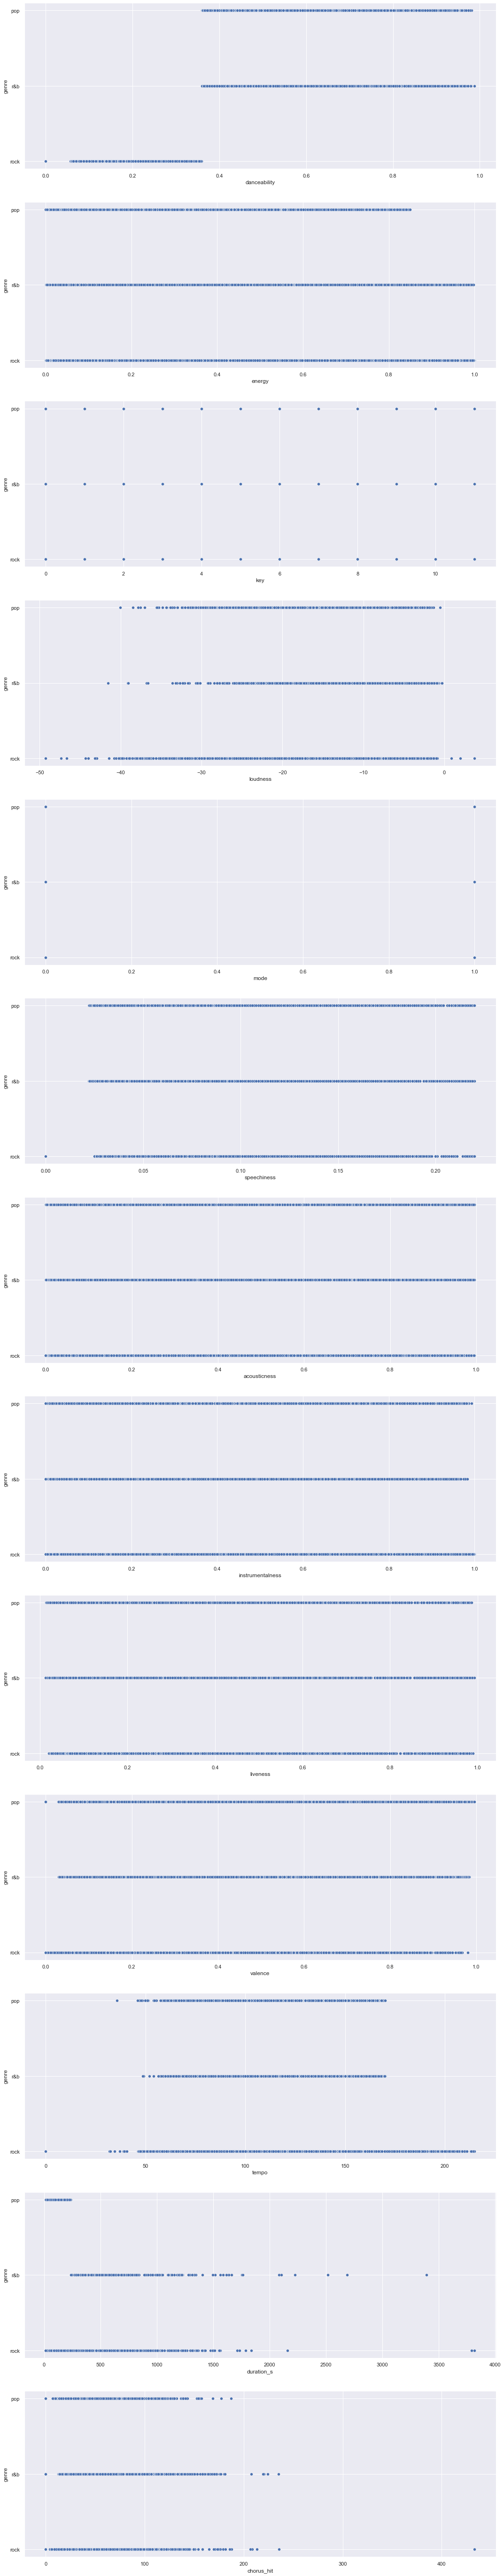

In [29]:
rnb_sim_data = duplicatesongdata.loc[(duplicatesongdata['genre'].isin(['r&b', 'pop', 'rock']))]

f, axes = plt.subplots(13, 1, figsize=(18, 100))
count = 0;

for var in rnb_sim_data:
    if(var != "genre"):
        sb.scatterplot(data=rnb_sim_data, x=var, y="genre", ax=axes[count])
        count += 1

Similar clustering of predictor values between R&B, Pop and Rock songs:
1. Danceability (R&B, Pop)
2. Energy
3. Key
4. Loudness
5. Mode
6. Speechiness
7. Acousticness
8. Instrumentalness
9. Liveness
10. Valence
11. Tempo
12. Duration_s (R&B, Rock)
13. Chorus_hit

### Similarity in Characteristics Between Rap, R&B and Pop

Let's plot the scatter plots to find the similarities between Rap, R&B and Pop

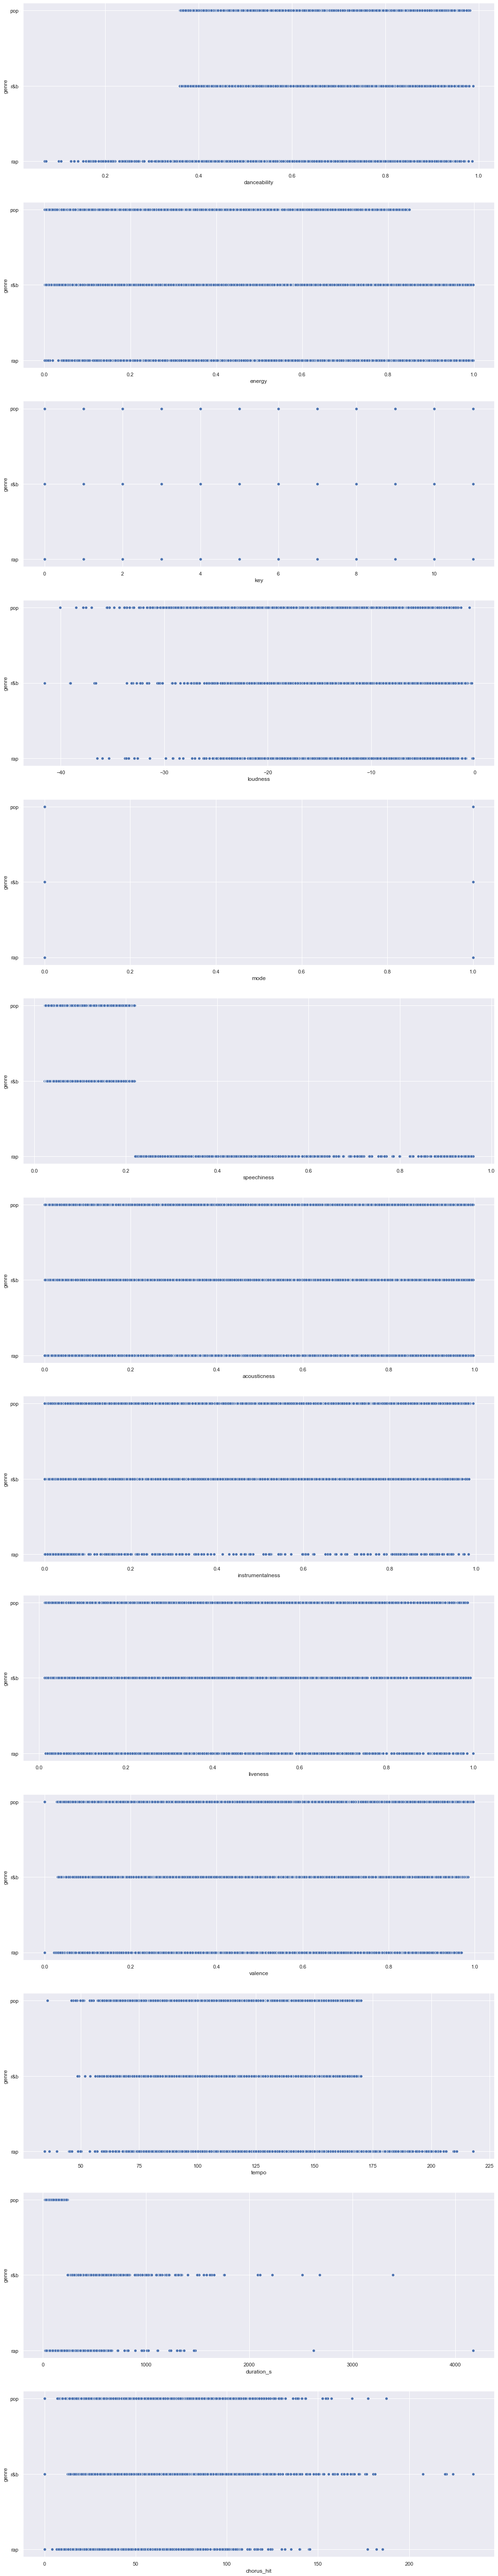

In [30]:
rap_sim_data = duplicatesongdata.loc[(duplicatesongdata['genre'].isin(['rap', 'r&b', 'pop']))]

f, axes = plt.subplots(13, 1, figsize=(18, 100))
count = 0;

for var in rap_sim_data:
    if(var != "genre"):
        sb.scatterplot(data=rap_sim_data, x=var, y="genre", ax=axes[count])
        count += 1

Similar clustering of predictor values between Rap, R&B and Pop songs:
1. Danceability
2. Energy
3. Key
4. Loudness
5. Mode
6. Acousticness
7. Instrumentalness
8. Liveness
9. Valence
10. Tempo
11. Duration_s
12. Chorus_hit

Predictor values where Rap is unique:
1. Speechiness

### Similarity in Characteristics Between Rock and Pop

Let's plot the scatter plots to find the similarities between Rock and Pop

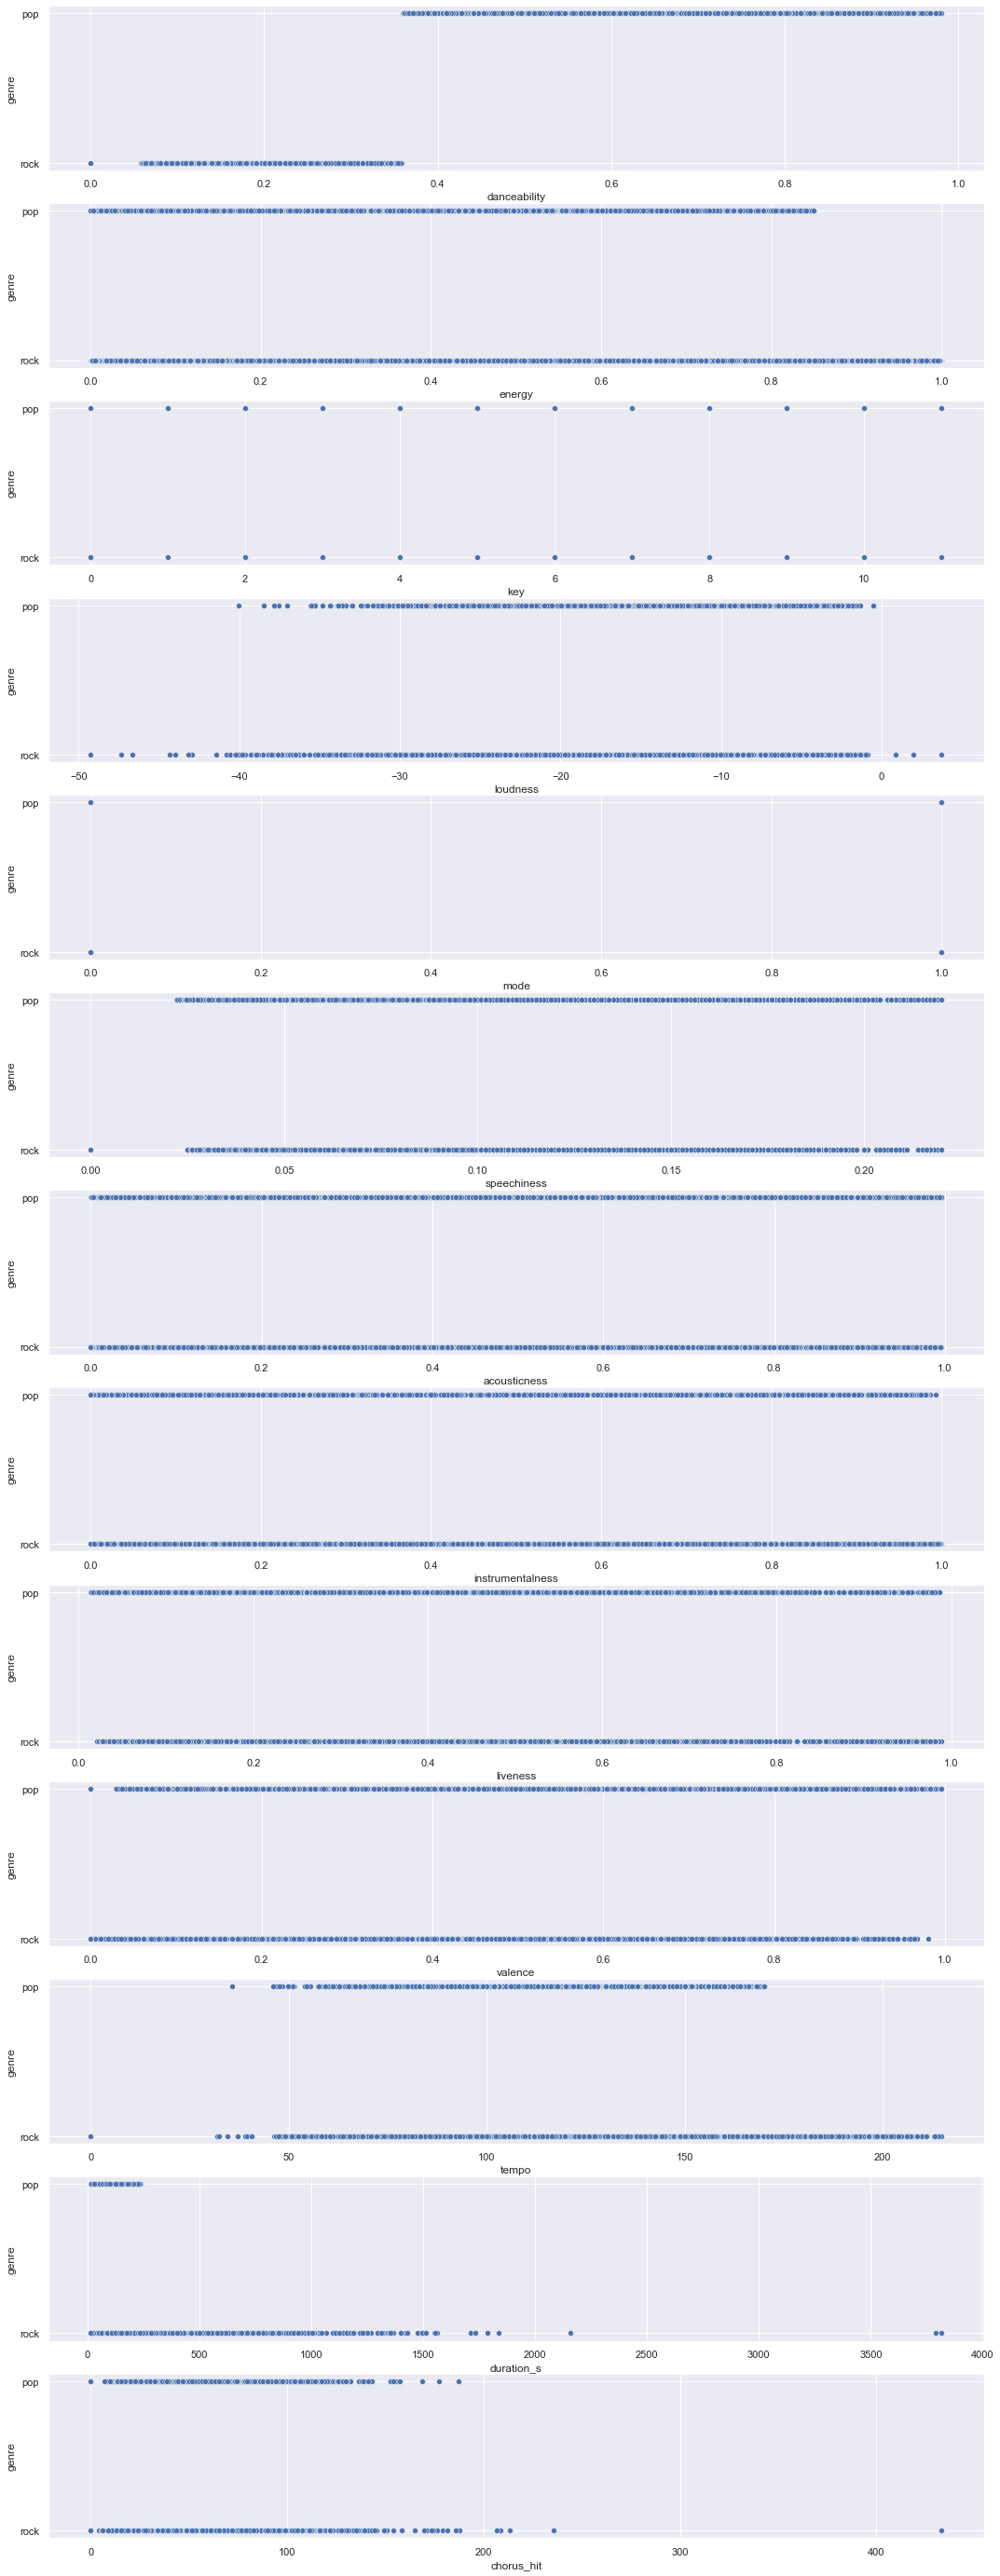

In [31]:
rock_sim_data = duplicatesongdata.loc[(duplicatesongdata['genre'].isin(['rock', 'pop']))]

f, axes = plt.subplots(13, 1, figsize=(18, 50))
count = 0;

for var in rock_sim_data:
    if(var != "genre"):
        sb.scatterplot(data=rock_sim_data, x=var, y="genre", ax=axes[count])
        count += 1

Similar clustering of predictor values between Rock and Pop songs:
1. Energy
2. Key
3. Loudness
4. Mode
5. Speechiness
6. Acousticness
7. Instrumentalness
8. Liveness
9. Valence
10. Tempo
11. Chorus_hit

Predictor values where Rock is unique:
1. Danceability
2. Duration_s

### Most unique predictor variables:

Based on the similarities identified between genres which the model most incorrectly predicts, these variables seem to be the most unique in distinguishing the different genres:
1. Instrumentalness
2. Liveness
3. Tempo
4. Energy
5. Loudness
6. Speechiness
7. Duration_s

In [34]:
songdata.drop(columns=['acousticness', 'valence', 'mode'], inplace=True)
songdata.describe()

,danceability,energy,key,loudness,speechiness,instrumentalness,liveness,tempo,duration_s,genre
count,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000
mean,0.543350,0.577640,5.198393,0.734854,0.077077,0.161870,0.192366,0.494077,235.412968,2.755167
std,0.181269,0.254805,3.533529,0.101619,0.091748,0.309411,0.176929,0.121035,122.663760,1.301983
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.168000,0.000000
25%,0.421053,0.391847,2.000000,0.685378,0.035313,0.000000,0.082252,0.402551,172.213000,2.000000
50%,0.555668,0.598899,5.000000,0.753590,0.045625,0.000143,0.120690,0.486246,217.627000,2.000000
75%,0.676113,0.786947,8.000000,0.808404,0.073958,0.082000,0.253550,0.565837,267.093000,3.000000
max,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4170.227000,5.000000


In [35]:
songdata['genre'].value_counts()

2    14247
3     9499
5     6157
1     2497
4     2127
0     1326
Name: genre, dtype: int64

In [36]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.20)

for train_index, test_index in split.split(songdata, songdata['genre']):
     train_set, test_set = songdata.iloc[train_index], songdata.iloc[test_index]

# after obtaining train/test set, proceed to split train into X and y train set, and test into x and y test set
y_train = pd.DataFrame(train_set['genre'])
x_train = train_set
x_train = x_train.drop(columns=['genre'])

y_test = pd.DataFrame(test_set['genre'])
x_test = test_set
x_test = x_test.drop(columns=['genre'])

Check how many songs in each genre there are in train/test set

In [37]:
y_train.value_counts

<bound method DataFrame.value_counts of        genre
34586      2
36745      4
34411      3
6802       2
5916       5
...      ...
40336      1
36792      3
37748      2
5756       2
41002      2

[28682 rows x 1 columns]>

In [38]:
print(len(y_train))
print((int)(np.ceil(10**6 / len(y_train))))

28682
35


In [39]:
y_test.value_counts()

genre
2        2850
3        1900
5        1232
1         499
4         425
0         265
dtype: int64

After obtaining Train/Test data, use MLPClassifier

Try plotting the correlation matrix.

In [ ]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

#y_train_minmax = MinMaxScaler().fit_transform(y_train)
#y_train_minmax = y_train_minmax.astype('int')
#y_train_normalized = (y_train-y_train.min())/(y_train.max()-y_train.min())

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(400, 300, 250, 100, 50), max_iter=3000,
                           activation = 'relu', solver='sgd', learning_rate='adaptive', learning_rate_init=0.0001,
                           momentum=0.9, batch_size=6, random_state=1)

classifier.fit(x_train, y_train.values.ravel())
y_pred = classifier.predict(x_train)

#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_train)

#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

In [ ]:
sb.heatmap(cm, annot=True, fmt=".0f", annot_kws={"size":18})

Check the accuracy on the test data.

In [ ]:
# scale the response variable for test and predict
#y_test_minmax = MinMaxScaler().fit_transform(y_test)
#y_test_minmax = y_test_minmax.astype('int64')
#y_test_normalized = (y_test-y_test.min())/(y_test.max()-y_test.min())
y_test_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test_pred, y_test)

# print accuracy
print('Accuracy of MLPClassifier on test data :', accuracy(cm))

Verification with new dataset

In [ ]:
validationdata = pd.read_csv('data/genres_v2.csv', low_memory=False)
validationdata.drop(columns=['type', 'id', 'uri', 'track_href', 'analysis_url', 'time_signature', 'Unnamed: 0', 'title', 'acousticness', 'valence', 'mode'], inplace=True)
validationdata = validationdata.loc[validationdata['genre'].isin(['Pop', 'RnB', 'Rap'])]
validationdata.drop_duplicates(subset=['song_name'], keep='first')

for index_label, row_series in validationdata.iterrows():
    if validationdata.at[index_label , 'genre'] == 'Pop':
        validationdata.at[index_label , 'genre'] = 2
    elif validationdata.at[index_label , 'genre'] == 'RnB':
        validationdata.at[index_label , 'genre'] = 3
    elif validationdata.at[index_label , 'genre'] == 'Rap':
        validationdata.at[index_label , 'genre'] = 4

validationdata['genre'] = pd.to_numeric(validationdata['genre'])
validationdata.head(50000)

In [ ]:
## converting duration_ms to duration_s as duration_s was used in original dataset
validationdata["duration_ms"] = validationdata["duration_ms"]/1000
validationdata.rename(columns={"duration_ms":"duration_s"},inplace=True)

validationdata[['danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'speechiness', 'duration_s']] = MinMaxScaler().fit_transform(validationdata[['danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'speechiness', 'duration_s']])
validationdata.drop(columns=['song_name'], inplace=True)

response = pd.DataFrame(validationdata['genre'])
predictor = validationdata
predictor = validationdata.drop(columns=['genre'])

validation_pred = classifier.predict(predictor)
cm = confusion_matrix(validation_pred, response)

# print accuracy
print('Accuracy of MLPClassifier on test data :', accuracy(cm))

sb.heatmap(cm, annot=True, fmt=".0f", annot_kws={"size":18})